***
# Evaluation of Different RPLH Systems
***
Both performing aggregated analysis (per trial) and step analysis (per environmental steps)

In [3]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

current_folder = Path.cwd()
parent_folder = current_folder.parent.parent
sys.path.insert(0, str(parent_folder))
print(parent_folder)

from rplh.evaluation.get_data import get_data
from rplh.evaluation.embed import *
from rplh.evaluation.energy import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/kevinb/Desktop/dsc190/RPLH


# Importing Data With Our Getter Functions

In [4]:
print("LOADING RPLH-SPY-AGENT-3UP...")
base_dir = parent_folder / "data" / "3up" / "gpt-agent-testing-env-3up"
df_a_spy, success_df_a_spy, spy_count_df, spy_df, att_df, justification_df, dist_a_spy = get_data(base_dir, 20)

print("\nLOADING RPLH-SPY-STANDARD-3UP...")
base_dir = parent_folder  / "data" / "3up" / "gpt-standard-testing-env-3up"
df_s_spy, success_df_s_spy, _, _, _, justification_df_standard, dist_s_spy = get_data(base_dir, 20)

print("\nLOADING RPLH-NoSPY-STANDADRD-3UP...")
base_dir = parent_folder  / "data" / "3up" / "gpt-standard-testing-nospy-env-3up"
df_s_nospy, success_df_s_nospy, _, _, _, justification_df_standard_nospy, dist_s_nospy = get_data(base_dir, 20)

print("LOADING RPLH-SPY-AGENT-2UP...")
base_dir = parent_folder / "data" / "2up" / "gpt-agent-testing-env-2up"
df_a_spy2, success_df_a_spy2, spy_count_df2, spy_df2, att_df2, justification_df2, dist_a_spy2 = get_data(base_dir, 12)

print("\nLOADING RPLH-SPY-STANDARD-2UP...")
base_dir = parent_folder  / "data" / "2up" / "gpt-standard-testing-env-2up"
df_s_spy2, success_df_s_spy2, _, _, _, _, dist_s_spy2 = get_data(base_dir, 20)

print("\nLOADING RPLH-NoSPY-STANDADRD-2UP...")
base_dir = parent_folder  / "data" / "2up" / "gpt-standard-testing-nospy-env-2up"
df_s_nospy2, success_df_s_nospy2, _, _, _, _, dist_s_nospy2 = get_data(base_dir, 20)

LOADING RPLH-SPY-AGENT-3UP...
trial_6: Not Converged
trial_7: Not Converged
trial_15: Not Converged
trial_17: Not Converged
trial_19: Not Converged
trial_20: Not Converged

LOADING RPLH-SPY-STANDARD-3UP...
trial_1: Not Converged
trial_3: Not Converged
trial_4: Not Converged
trial_7: Not Converged
trial_9: Not Converged
trial_12: Not Converged
trial_16: Not Converged
trial_17: Not Converged
trial_18: Not Converged

LOADING RPLH-NoSPY-STANDADRD-3UP...
trial_3: Not Converged
trial_5: Not Converged
trial_6: Not Converged
trial_9: Not Converged
trial_17: Not Converged
trial_18: Not Converged
trial_19: Not Converged
LOADING RPLH-SPY-AGENT-2UP...
trial_2: Not Converged
trial_11: Not Converged
trial_12: Not Converged

LOADING RPLH-SPY-STANDARD-2UP...
trial_5: Not Converged
trial_9: Not Converged
trial_10: Not Converged
trial_17: Not Converged
trial_19: Not Converged
trial_20: Not Converged

LOADING RPLH-NoSPY-STANDADRD-2UP...
trial_3: Not Converged
trial_7: Not Converged
trial_8: Not Converged

In [5]:
agent_spy_merged = df_a_spy.merge(success_df_a_spy, on="Trial")
standard_spy_merged = df_s_spy.merge(success_df_s_spy, on="Trial")
standard_nospy_merged = df_s_nospy.merge(success_df_s_nospy, on="Trial")

In [6]:
agent_round = spy_count_df.divide(spy_count_df.sum(axis=1), axis=0).round(2)
agent_round.idxmax(axis=1).value_counts()

Agent[1.5, 1.5]    9
Agent[0.5, 1.5]    8
Agent[1.5, 0.5]    2
Agent[2.5, 1.5]    1
Name: count, dtype: int64

***
# Norm Distance Metrics Per-Trial
***

1. Area under the steps is the `energy` or all the steps needed for a system to converge (only converged ones are used)
2. Slope is convergence speed
3. Agent spy's environment is more complicated

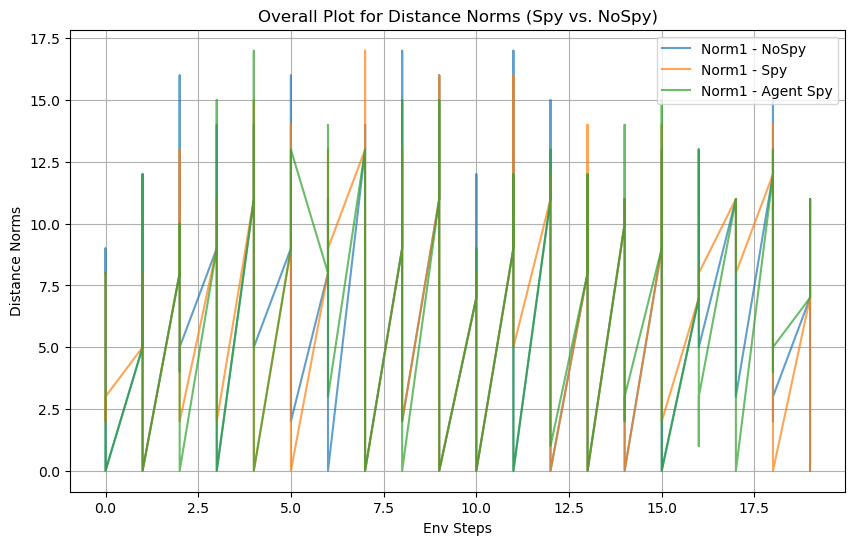

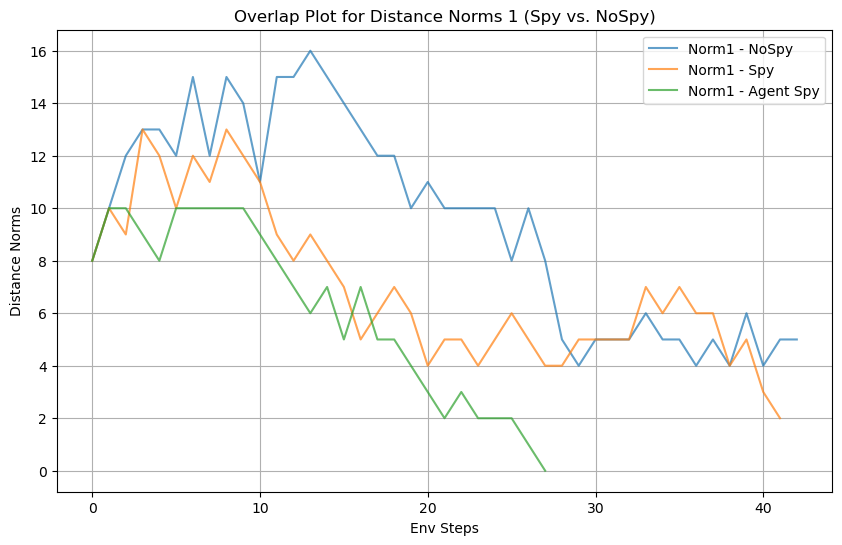

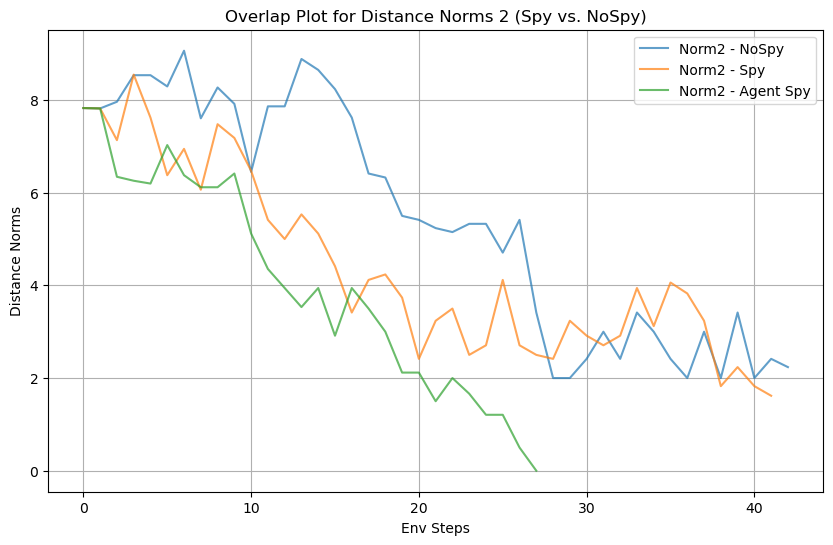

In [7]:
plot_env_progression(dist_a_spy, dist_s_spy, dist_s_nospy, get_trial=2)

We only want to compare the converged ones for `AUC` metric

In [8]:
agent_spy_dist_merged = dist_a_spy.merge(success_df_a_spy, on="Trial")
standard_spy_dist_merged = dist_s_spy.merge(success_df_s_spy, on="Trial")
standard_nospy_dist_merged = dist_s_nospy.merge(success_df_s_nospy, on="Trial")

In [9]:
all_a_spy = agent_spy_dist_merged[agent_spy_dist_merged["Convergence"] == "Converged"].drop(columns=["Trial"]).reset_index(drop=True)
all_spy = standard_spy_dist_merged[standard_spy_dist_merged["Convergence"] == "Converged"].drop(columns=["Trial"]).reset_index(drop=True)
all_nospy = standard_nospy_dist_merged[standard_nospy_dist_merged["Convergence"] == "Converged"].drop(columns=["Trial"]).reset_index(drop=True)

We need to preprocess the data, including reassigning `trial number` and `env step number`

In [10]:
new_a_dist = dist_df_process(all_a_spy)
new_s_dist = dist_df_process(all_spy)
new_s_nospy_dist = dist_df_process(all_nospy)

In [11]:
new_a_dist

,env_step,trial,Norm1,Norm2
0,0,0,8.0,3.831394
1,1,0,4.0,2.602736
2,2,0,4.0,2.602736
3,3,0,4.0,2.602736
4,4,0,4.0,2.602736
...,...,...,...,...
360,16,13,2.0,1.000000
361,17,13,2.0,1.000000
362,18,13,2.0,1.000000
363,19,13,1.0,0.000000


Check filtered

In [12]:
new_a_dist['trial'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [13]:
new_s_dist['trial'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [14]:
new_s_nospy_dist['trial'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Calculate the total `AUC` metrics

In [15]:
calculate_auc(new_a_dist)

Overall AUC for Norm1: 187.71428571428572
Overall AUC for Norm2: 108.59262775932079


(187.71428571428572, 108.59262775932079)

In [16]:
calculate_auc(new_s_dist)

Overall AUC for Norm1: 228.8181818181818
Overall AUC for Norm2: 133.27889394692093


(228.8181818181818, 133.27889394692093)

In [17]:
calculate_auc(new_s_nospy_dist)

Overall AUC for Norm1: 241.80769230769232
Overall AUC for Norm2: 138.93376600704124


(241.80769230769232, 138.93376600704124)

Let's do a regression line. A more negative slope in the context of this regression indicates a faster rate of decline in the dependent variable (distance metrics)

In [18]:
calculate_slope(new_a_dist)

Average slope for Norm1: -0.38765125806035183
Average slope for Norm2: -0.2704926585392068


(-0.38765125806035183, -0.2704926585392068)

In [19]:
calculate_slope(new_s_dist)

Average slope for Norm1: -0.3326826865160759
Average slope for Norm2: -0.23993066999109416


(-0.3326826865160759, -0.23993066999109416)

In [20]:
calculate_slope(new_s_nospy_dist)

Average slope for Norm1: -0.2789855847676718
Average slope for Norm2: -0.1912987570724582


(-0.2789855847676718, -0.1912987570724582)

***
# Aggregated Senetnce Embedding Analysis
***

Easiest idea, let's `explode()` all the sentence respond in agent models to see similarity with given spy or non-spy sentence.

Test to see if embedding function working.

In [21]:
sentence1 = "The cat sat on the mat."
sentence2 = "A cat was sitting on the mat."

embedding_1 = get_embedding(sentence1)
embedding_2 = get_embedding(sentence2)

cosine_sim(embedding_1, embedding_2)

0.9777018864480065

Need to check last few ones

### Compare aggregated nice senntence with nice agent spy agent in `att_df`

In [22]:
sentence1 = "Seems to be be very easy going, trying to find agreement with the central ageent and the goal is to resolve conversation."
sentence2 = "".join(str(att_df['Agent[2.5, 1.5]'].explode().unique()))
sentence3 = "".join(str(att_df['Agent[2.5, 0.5]'].explode().unique()))
sentence4 = "".join(str(att_df['Agent[1.5, 1.5]'].explode().unique()))

print(f"Compare represenattion between nice sentence and nice agent: {cosine_sim(get_embedding(sentence1), get_embedding(sentence3))}")
print(f"Compare representation between nice sentence and spy agent: {cosine_sim(get_embedding(sentence1), get_embedding(sentence4))}")
print(f"Compare represenattion of 2 nice agent: {cosine_sim(get_embedding(sentence2), get_embedding(sentence3))}")

Compare represenattion between nice sentence and nice agent: 0.477384468842258
Compare representation between nice sentence and spy agent: 0.41071185602423244
Compare represenattion of 2 nice agent: 0.9030917904335105


### Compare aggregated spy sentence with non-spy agent and spy agent in `att_df`

In [23]:
sentence1 = "Seems to be the spy agent, its goal is to prevent match targets."
sentence2 = "".join(str(att_df['Agent[1.5, 1.5]'].explode().unique()))
sentence3 = "".join(str(att_df['Agent[2.5, 0.5]'].explode().unique()))

print(f"Compare represenattion between spy sentence and spy agent: {cosine_sim(get_embedding(sentence1), get_embedding(sentence2))}")
print(f"Compare represenattion between spy sentence and non-spy agent: {cosine_sim(get_embedding(sentence1), get_embedding(sentence3))}")

Compare represenattion between spy sentence and spy agent: 0.6157219010540025
Compare represenattion between spy sentence and non-spy agent: 0.6053309840915431


Aggregated sentence embedding doesn't seem to work so well.

***
# Per-Trial Senetnce Embedding Analysis
***

Let's now use the look at similarity per trial instead of an aggregated sentence we will look at
- `agent model` embedding similarity with spy sentence.
- `spy model` embedding similarity with spy sentence.
- `agent model` embedding similarity with non-spy sentence.
- `justificatoon` embedding with justification sentence to see if suspecting is given.

In [24]:
df_trial_embed = pd.DataFrame()
sentence1 = "Seems to be the spy agent, its goal is to prevent match targets"
sentence2 = "Seems to be be very easy going, trying to find agreement with the central ageent and the goal is to resolve conversation."
sentence3 = "I suspect that this agent is the spy agent, thus, I would not listen to this agent."
embedding_1 = get_embedding(sentence1)
embedding_2 = get_embedding(sentence2)
embedding_3 = get_embedding(sentence3)

df_trial_embed['Att_Embed_SpySent_Agent[1.5, 1.5]'] = att_df.reset_index()['Agent[1.5, 1.5]'].apply(lambda x: cosine_sim(embedding_1, get_embedding(str(x))))
df_trial_embed['Att_Embed_NonSpySent_Agent[1.5, 1.5]'] = att_df.reset_index()['Agent[1.5, 1.5]'].apply(lambda x: cosine_sim(embedding_2, get_embedding(str(x))))
df_trial_embed['Spy_Embed_SpySent_Agent[1.5, 1.5]'] = spy_df.reset_index()['Agent[1.5, 1.5]'].apply(lambda x: cosine_sim(embedding_1, get_embedding(str(x))))
df_trial_embed['Justification_Embed'] = justification_df.reset_index()['Justifications'].apply(lambda x: cosine_sim(embedding_3, get_embedding(str(x))))
df_trial_embed

,"Att_Embed_SpySent_Agent[1.5, 1.5]","Att_Embed_NonSpySent_Agent[1.5, 1.5]","Spy_Embed_SpySent_Agent[1.5, 1.5]",Justification_Embed
0,0.498783,0.431337,0.583837,0.617001
1,0.555409,0.369837,0.634192,0.500486
2,0.579711,0.396482,0.680379,0.650587
3,0.620892,0.446607,0.747992,0.651606
4,0.555391,0.406046,0.599418,0.602094
5,0.560213,0.492380,0.579917,0.598154
6,0.589882,0.488796,0.636751,0.640405
7,0.517687,0.408757,0.561800,0.557793
8,0.487824,0.472294,0.524487,0.624391
9,0.551335,0.437907,0.526782,0.572241


***
# Structured Embedding Similarity Analysis
***

We have written a function to do similar things as the above, but more rigrously and get everything directly.

In [25]:
spy_embedding = get_spy_detect_embedding(agent_spy_merged, spy_df, justification_df,
                                         spy_sentence="Seems to be the spy agent, its goal is to prevent match targets.",
                                         just_sentence="I suspect that this agent is the spy agent, thus, I would not listen to this agent.",
                                         spy_agents=["Agent[0.5, 0.5]", "Agent[1.5, 1.5]", "Agent[2.5, 2.5]"],
                                         only_spy=True)
spy_embedding

,Trial,Num_Boxes,Avg_Boxes_To_Targets_Per_Response,Avg_Boxes_To_Other_Per_Response,Convergence,Num_Responses,"Spy_Embed_Agent[0.5, 0.5]","Spy_Embed_Agent[2.5, 2.5]","Spy_Embed_Agent[1.5, 1.5]",Justification_Embed
0,trial_1,8,0.571429,0.714286,Converged,14,0.675143,0.353954,0.594204,0.617001
1,trial_2,11,0.440000,1.480000,Converged,25,0.647305,0.734128,0.640134,0.500486
2,trial_3,11,0.407407,1.740741,Converged,27,0.618273,0.621723,0.684246,0.650587
3,trial_4,10,0.384615,1.038462,Converged,26,0.657759,0.733541,0.753357,0.651606
4,trial_5,12,0.307692,2.128205,Converged,39,0.528011,0.536061,0.604009,0.602094
5,trial_6,12,0.100000,0.200000,Not Converged,50,0.565911,0.577602,0.587502,0.598154
6,trial_7,10,0.200000,1.688889,Not Converged,45,0.457362,0.598549,0.647122,0.640405
7,trial_8,8,0.380952,1.857143,Converged,21,0.634957,0.716670,0.565344,0.557793
8,trial_9,10,0.400000,1.720000,Converged,25,0.556357,0.625864,0.529466,0.624391
9,trial_10,11,0.458333,1.041667,Converged,24,0.546744,0.544890,0.529662,0.572241


In [26]:
filtered_spy_embed = spy_embedding[spy_embedding['Convergence']=="Converged"].drop(columns=["Avg_Boxes_To_Targets_Per_Response", "Avg_Boxes_To_Other_Per_Response"])
filtered_spy_embed.describe()

,Num_Boxes,Num_Responses,"Spy_Embed_Agent[0.5, 0.5]","Spy_Embed_Agent[2.5, 2.5]","Spy_Embed_Agent[1.5, 1.5]",Justification_Embed
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,9.785714,25.142857,0.570538,0.643230,0.619103,0.615159
std,1.577660,6.780710,0.108039,0.109523,0.074772,0.050114
min,8.000000,14.000000,0.353954,0.353954,0.529466,0.500486
25%,8.000000,20.250000,0.532694,0.599519,0.567079,0.590435
50%,10.000000,25.000000,0.587794,0.683120,0.599107,0.619610
75%,11.000000,27.000000,0.644218,0.725615,0.673218,0.651351
max,12.000000,39.000000,0.711985,0.734128,0.753357,0.698648


In [27]:
# from tabulate import tabulate
# markdown_table = tabulate(filtered_spy_embed.drop(columns=['Num_Boxes', 'Num_Responses']).describe(), headers='keys', tablefmt='pipe')
# print(markdown_table)

Let's use all the features, not just the spy ones

In [28]:
spy_embedding = get_spy_detect_embedding(agent_spy_merged, spy_df, justification_df,
                                         spy_sentence="Seems to be the spy agent, its goal is to prevent match targets.",
                                         just_sentence="I suspect that this agent is the spy agent, thus, I would not listen to this agent.",
                                         spy_agents=["Agent[0.5, 0.5]", "Agent[1.5, 1.5]", "Agent[2.5, 2.5]"],
                                         only_spy=False)

***
# Create Big DF for Correlation Studies
***

We need to combine both upper 2 and upper 3 data together.

In [29]:
standard_for_merge_spy = standard_spy_merged.drop(columns=["Boxes_To_Targets", "Boxes_To_Other"])
standard_for_merge_nospy = standard_nospy_merged.drop(columns=["Boxes_To_Targets", "Boxes_To_Other"])

spy_embedding["Have_spy"] = 1
standard_for_merge_spy["Have_spy"] = 1
standard_for_merge_nospy["Have_spy"] = 0

Creat three dataset:
- Full dataset
- Only spy data
- With convergence info

In [30]:
rplh_df = pd.concat([spy_embedding, standard_for_merge_spy, standard_for_merge_nospy], axis=0, ignore_index=True).drop(columns=["Trial", "Convergence", "Avg_Boxes_To_Other_Per_Response"]).fillna(0)
rplh_df_all_spy = pd.concat([spy_embedding, standard_for_merge_spy], axis=0, ignore_index=True).drop(columns=["Trial", "Convergence", "Avg_Boxes_To_Other_Per_Response", "Have_spy"]).fillna(0)
rplh_df_with_conv = pd.concat([spy_embedding, standard_for_merge_spy, standard_for_merge_nospy], axis=0, ignore_index=True).drop(columns=["Trial", "Avg_Boxes_To_Other_Per_Response"]).fillna(0)

Avg_Boxes_To_Targets_Per_Response    1.000000
Spy_Embed_Agent[1.5, 1.5]            0.382516
Justification_Embed                  0.366306
Spy_Embed_Agent[2.5, 2.5]            0.330947
Spy_Embed_Agent[0.5, 0.5]            0.275750
Num_Boxes                           -0.049351
Num_Responses                       -0.783569
Name: Avg_Boxes_To_Targets_Per_Response, dtype: float64


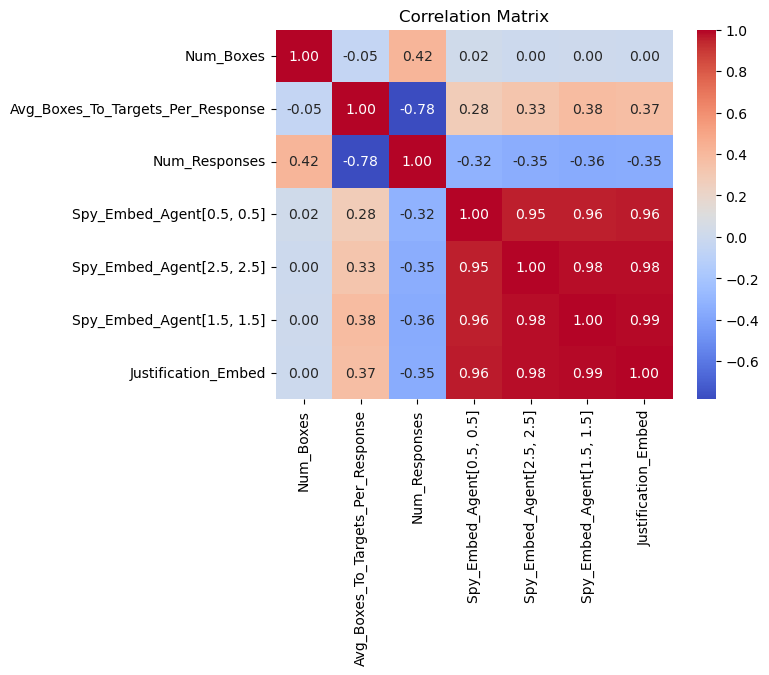

In [31]:
import seaborn as sns

spy_embedding_small = get_spy_detect_embedding(agent_spy_merged, spy_df, justification_df,
                                         spy_sentence="Seems to be the spy agent, its goal is to prevent match targets.",
                                         just_sentence="I suspect that this agent is the spy agent, thus, I would not listen to this agent.",
                                         spy_agents=["Agent[0.5, 0.5]", "Agent[1.5, 1.5]", "Agent[2.5, 2.5]"],
                                         only_spy=True)

rplh_df_small = (pd.concat([spy_embedding_small, standard_for_merge_spy, standard_for_merge_nospy], axis=0, ignore_index=True)
                 .drop(columns=["Trial", "Convergence", "Avg_Boxes_To_Other_Per_Response", "Have_spy"])
                 .fillna(0))

correlation_matrix = rplh_df_small.corr()
target_corr = correlation_matrix["Avg_Boxes_To_Targets_Per_Response"].sort_values(ascending=False)

print(target_corr)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Intuitively speaking, better understanding of who is the spy leads to decreasing in the convergence time (steps/response). We will do hypothesis testing later.

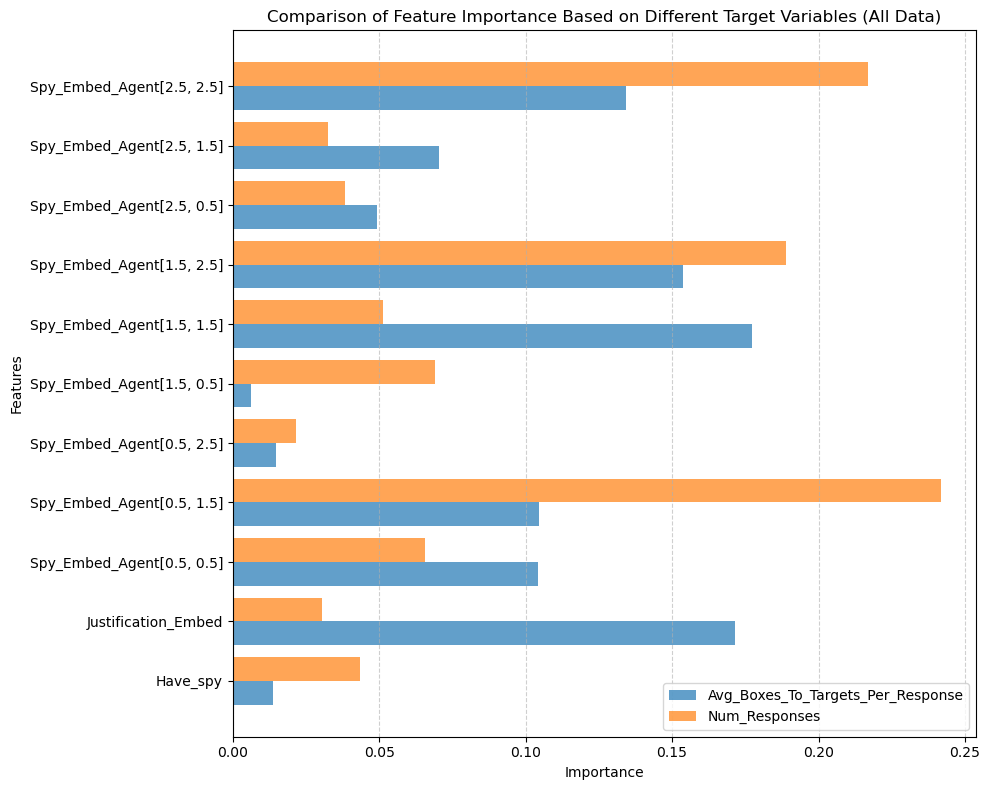

Explained Variance (R^2) for Avg_Boxes_To_Targets_Per_Response: -0.214
Explained Variance (R^2) for Num_Responses: 0.022


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Model 1: Train on Avg_Boxes_To_Targets_Per_Response
X1 = rplh_df.drop(columns=["Avg_Boxes_To_Targets_Per_Response", "Num_Responses", "Num_Boxes"])
y1 = rplh_df["Avg_Boxes_To_Targets_Per_Response"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train1, y_train1)

# Model 2: Train on Num_Responses
X2 = rplh_df.drop(columns=["Avg_Boxes_To_Targets_Per_Response", "Num_Responses", "Num_Boxes"])
y2 = rplh_df["Num_Responses"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train2, y_train2)

importances1 = pd.Series(model1.feature_importances_, index=X1.columns)
importances2 = pd.Series(model2.feature_importances_, index=X2.columns)

plt.figure(figsize=(10, 8))
y = range(len(importances1))

plt.barh(y, importances1.sort_index(), height=0.4, label="Avg_Boxes_To_Targets_Per_Response", alpha=0.7)
plt.barh([i + 0.4 for i in y], importances2.sort_index(), height=0.4, label="Num_Responses", alpha=0.7)
plt.yticks([i + 0.2 for i in y], importances1.sort_index().index)
plt.title("Comparison of Feature Importance Based on Different Target Variables (All Data)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

explained_variance_model1 = model1.score(X_test1, y_test1)
explained_variance_model2 = model2.score(X_test2, y_test2)
print(f"Explained Variance (R^2) for Avg_Boxes_To_Targets_Per_Response: {explained_variance_model1:.3f}")
print(f"Explained Variance (R^2) for Num_Responses: {explained_variance_model2:.3f}")

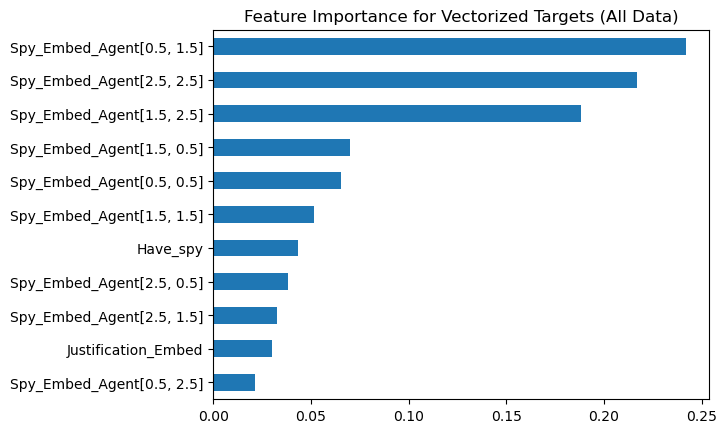

In [33]:
X = rplh_df.drop(columns=["Avg_Boxes_To_Targets_Per_Response", "Num_Responses", "Num_Boxes"])
y = rplh_df[["Num_Responses", "Avg_Boxes_To_Targets_Per_Response"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Feature Importance for Vectorized Targets (All Data)")
plt.show()

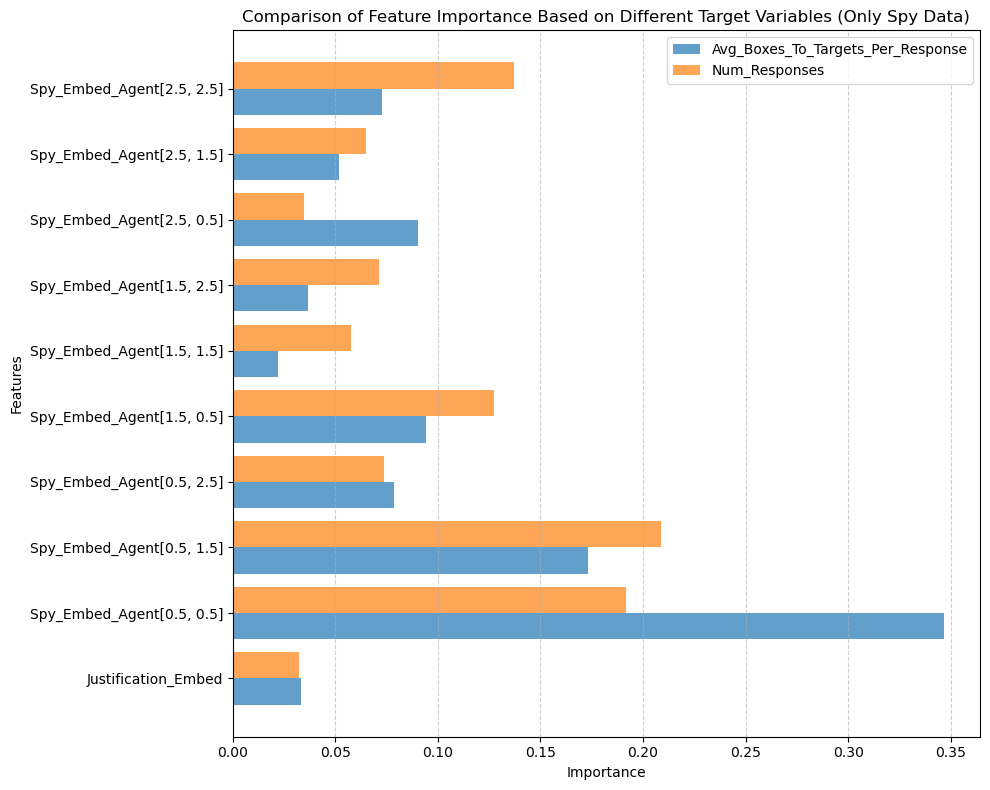

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Model 1: Train on Avg_Boxes_To_Targets_Per_Response
X1 = rplh_df_all_spy.drop(columns=["Avg_Boxes_To_Targets_Per_Response", "Num_Responses", "Num_Boxes"])
y1 = rplh_df_all_spy["Avg_Boxes_To_Targets_Per_Response"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train1, y_train1)

# Model 2: Train on Num_Responses
X2 = rplh_df_all_spy.drop(columns=["Avg_Boxes_To_Targets_Per_Response", "Num_Responses", "Num_Boxes"])
y2 = rplh_df_all_spy["Num_Responses"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train2, y_train2)

importances1 = pd.Series(model1.feature_importances_, index=X1.columns)
importances2 = pd.Series(model2.feature_importances_, index=X2.columns)

plt.figure(figsize=(10, 8))
y = range(len(importances1))

plt.barh(y, importances1.sort_index(), height=0.4, label="Avg_Boxes_To_Targets_Per_Response", alpha=0.7)
plt.barh([i + 0.4 for i in y], importances2.sort_index(), height=0.4, label="Num_Responses", alpha=0.7)
plt.yticks([i + 0.2 for i in y], importances1.sort_index().index)
plt.title("Comparison of Feature Importance Based on Different Target Variables (Only Spy Data)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

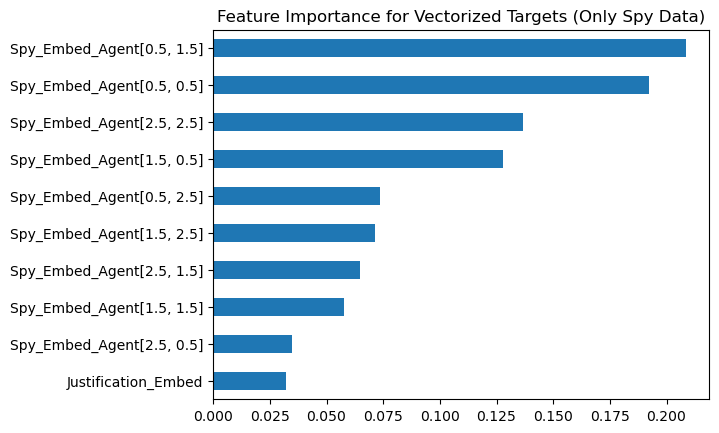

In [35]:
X = rplh_df_all_spy.drop(columns=["Avg_Boxes_To_Targets_Per_Response", "Num_Responses", "Num_Boxes"])
y = rplh_df_all_spy[["Num_Responses", "Avg_Boxes_To_Targets_Per_Response"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Feature Importance for Vectorized Targets (Only Spy Data)")
plt.show()

***
# Bootstrap More Data
***

In [38]:
rplh_df.columns

Index(['Num_Boxes', 'Avg_Boxes_To_Targets_Per_Response', 'Num_Responses',
       'Spy_Embed_Agent[0.5, 0.5]', 'Spy_Embed_Agent[1.5, 2.5]',
       'Spy_Embed_Agent[2.5, 1.5]', 'Spy_Embed_Agent[2.5, 0.5]',
       'Spy_Embed_Agent[0.5, 1.5]', 'Spy_Embed_Agent[2.5, 2.5]',
       'Spy_Embed_Agent[0.5, 2.5]', 'Spy_Embed_Agent[1.5, 1.5]',
       'Spy_Embed_Agent[1.5, 0.5]', 'Justification_Embed', 'Have_spy'],
      dtype='object')

In [39]:
num_synthetic_rows = 1000
# Generate synthetic data within the min-max range of each numerical column
synthetic_data = {
    column: np.random.uniform(rplh_df[column].min(), rplh_df[column].max(), num_synthetic_rows)
    for column in rplh_df.select_dtypes(include=np.number).columns
}

# For categorical columns like 'Have_spy', sample existing values
synthetic_data['Have_spy'] = np.random.choice(rplh_df['Have_spy'], size=num_synthetic_rows)

# Convert synthetic data into a DataFrame
df_synthetic = pd.DataFrame(synthetic_data)

# Combine the original and synthetic data
df_expanded = pd.concat([rplh_df, df_synthetic], ignore_index=True)
print(f"Expanded DataFrame shape: {df_expanded.shape}")

Expanded DataFrame shape: (1060, 14)


After bootsrtap, the columns tends to be normally distributed, emphasize on the mean.

In [40]:
df_expanded

,Num_Boxes,Avg_Boxes_To_Targets_Per_Response,Num_Responses,"Spy_Embed_Agent[0.5, 0.5]","Spy_Embed_Agent[1.5, 2.5]","Spy_Embed_Agent[2.5, 1.5]","Spy_Embed_Agent[2.5, 0.5]","Spy_Embed_Agent[0.5, 1.5]","Spy_Embed_Agent[2.5, 2.5]","Spy_Embed_Agent[0.5, 2.5]","Spy_Embed_Agent[1.5, 1.5]","Spy_Embed_Agent[1.5, 0.5]",Justification_Embed,Have_spy
0,8.000000,0.571429,14.000000,0.675143,0.558678,0.615318,0.556201,0.583687,0.353954,0.353954,0.594204,0.647790,0.617001,1
1,11.000000,0.440000,25.000000,0.647305,0.727824,0.654975,0.735305,0.663263,0.734128,0.689888,0.640134,0.726578,0.500486,1
2,11.000000,0.407407,27.000000,0.618273,0.655668,0.731000,0.601292,0.723797,0.621723,0.795070,0.684246,0.601316,0.650587,1
3,10.000000,0.384615,26.000000,0.657759,0.651190,0.728039,0.694355,0.518235,0.733541,0.718790,0.753357,0.774580,0.651606,1
4,12.000000,0.307692,39.000000,0.528011,0.661763,0.655013,0.668090,0.651323,0.536061,0.700136,0.604009,0.565760,0.602094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,9.929536,0.335249,24.353971,0.071263,0.746171,0.263739,0.519877,0.003830,0.433998,0.296829,0.538432,0.631848,0.635084,1
1056,11.731305,0.262225,34.745798,0.704174,0.645514,0.018571,0.071500,0.578254,0.369173,0.452616,0.087488,0.627364,0.160193,1
1057,13.268421,0.405726,11.179210,0.619263,0.111924,0.086551,0.376433,0.603631,0.083149,0.601824,0.190162,0.243860,0.533877,1
1058,11.694218,1.264082,35.629447,0.074464,0.293587,0.195951,0.017084,0.444171,0.379127,0.190693,0.473172,0.673538,0.631912,0


***
# Hypothesis Testing
***

Observed difference in means: -4.850
Bootstrap p-value: 0.098
Reject the null hypothesis: Having a spy significantly slows down convergence.


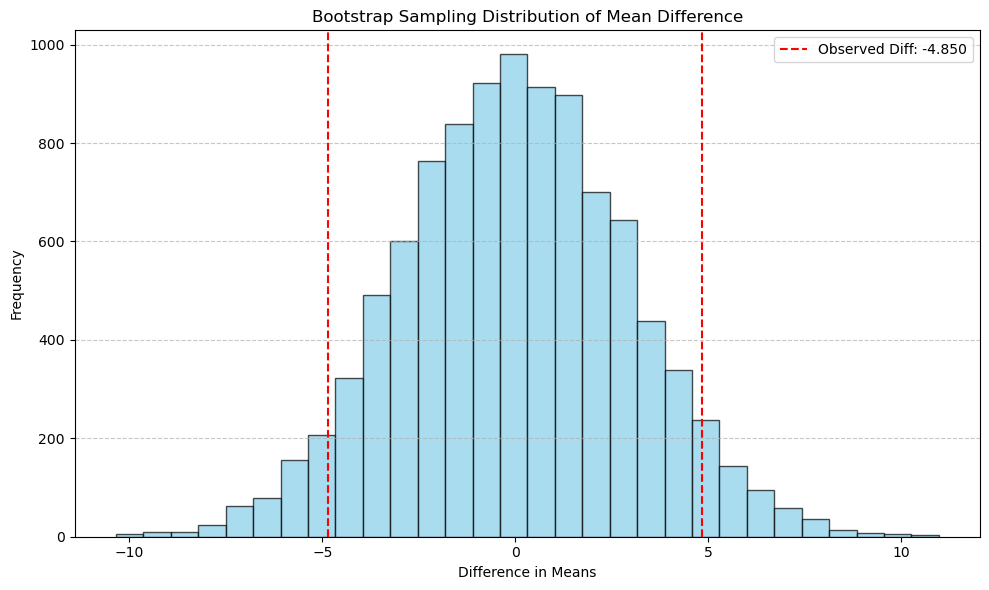

In [41]:
n_bootstrap = 10000

group_with_spy = rplh_df[rplh_df["Have_spy"] == 1]["Num_Responses"]
group_without_spy = rplh_df[rplh_df["Have_spy"] == 0]["Num_Responses"]
observed_diff = group_with_spy.mean() - group_without_spy.mean()
combined_data = np.concatenate([group_with_spy, group_without_spy])

bootstrap_diffs = []
for _ in range(n_bootstrap):
    resampled_group_with_spy = np.random.choice(combined_data, size=len(group_with_spy), replace=True)
    resampled_group_without_spy = np.random.choice(combined_data, size=len(group_without_spy), replace=True)
    bootstrap_diffs.append(resampled_group_with_spy.mean() - resampled_group_without_spy.mean())

bootstrap_diffs = np.array(bootstrap_diffs)
p_bootstrap = np.mean(np.abs(bootstrap_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff:.3f}")
print(f"Bootstrap p-value: {p_bootstrap:.3f}")

alpha = 0.1
if p_bootstrap < alpha:
    print("Reject the null hypothesis: Having a spy significantly slows down convergence.")
else:
    print("Fail to reject the null hypothesis: No evidence that having a spy affects convergence.")

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_diffs, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Diff: {observed_diff:.3f}')
plt.axvline(-observed_diff, color='red', linestyle='--')
plt.title('Bootstrap Sampling Distribution of Mean Difference')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***
# Feature Importance All Together
***

We have created functions to laod in all trials of data and do this comparison

/Users/kevinb/Desktop/dsc190/RPLH
LOADING 3up/gpt-agent-testing-env-3up 

trial_6: Not Converged
trial_7: Not Converged
trial_15: Not Converged
trial_17: Not Converged
trial_19: Not Converged
trial_20: Not Converged
LOADING 3up/gpt-standard-testing-env-3up 

trial_1: Not Converged
trial_3: Not Converged
trial_4: Not Converged
trial_7: Not Converged
trial_9: Not Converged
trial_12: Not Converged
trial_16: Not Converged
trial_17: Not Converged
trial_18: Not Converged
LOADING 3up/gpt-standard-testing-nospy-env-3up 

trial_3: Not Converged
trial_5: Not Converged
trial_6: Not Converged
trial_9: Not Converged
trial_17: Not Converged
trial_18: Not Converged
trial_19: Not Converged
LOADING 2up/gpt-agent-testing-env-2up 

trial_2: Not Converged
trial_11: Not Converged
trial_12: Not Converged
trial_14: Not Converged
trial_16: Not Converged
pg_state0.json not found for trial_17
pg_state0.json not found for trial_18
pg_state0.json not found for trial_19
pg_state0.json not found for trial_20
LOADIN

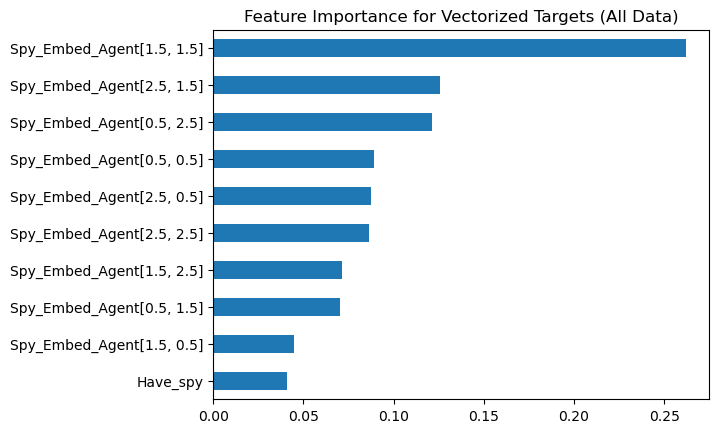

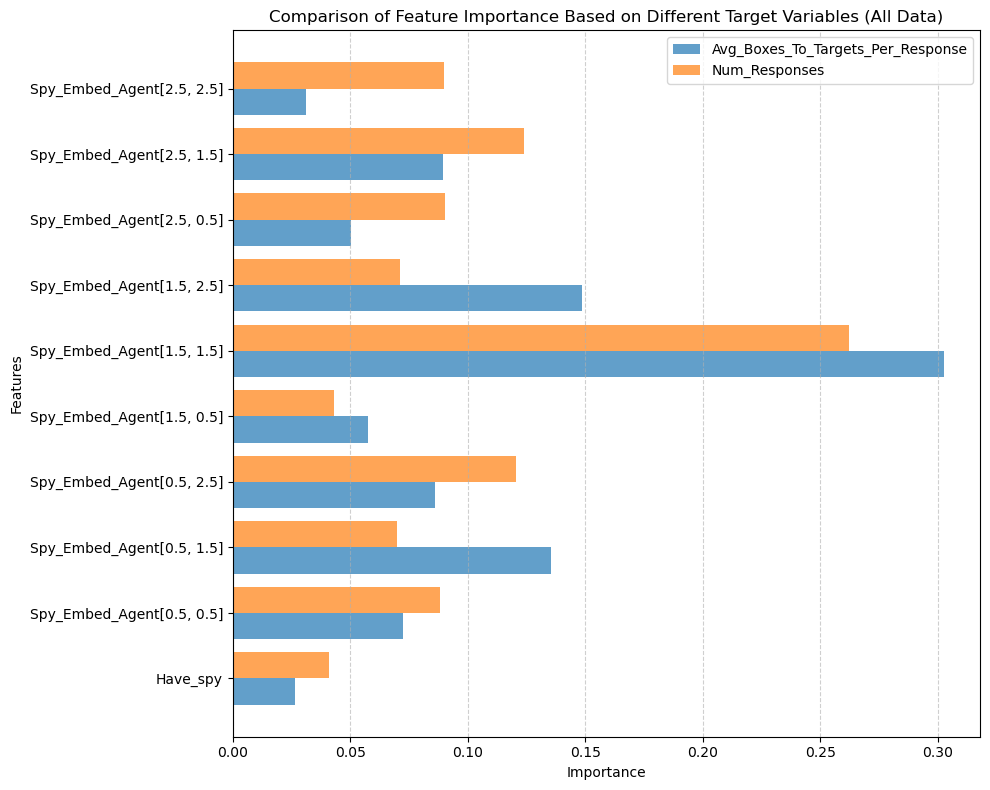

Observed difference in means: -3.925
Bootstrap p-value: 0.070
Reject the null hypothesis: Having a spy significantly slows down convergence.


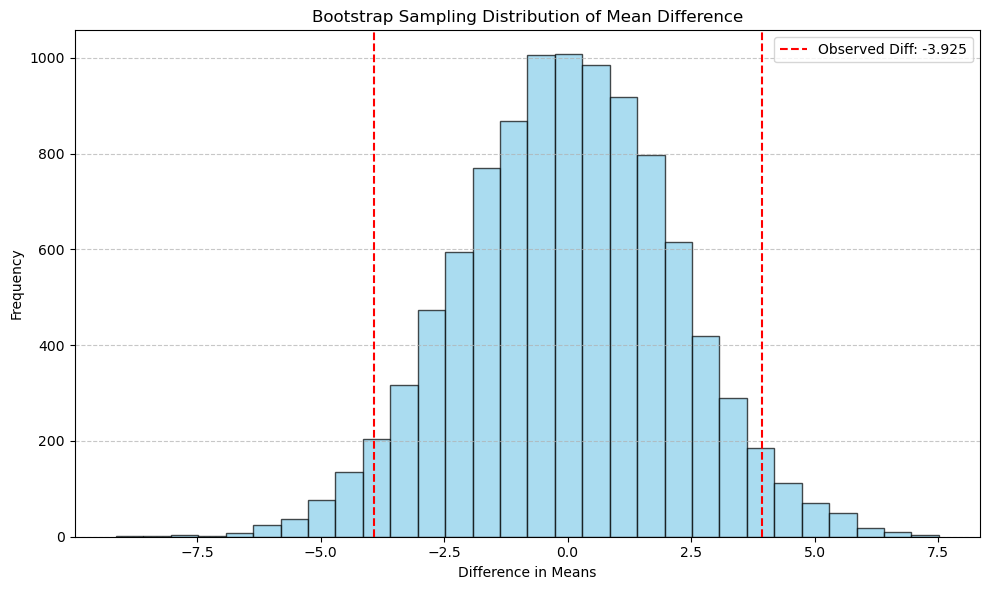

In [66]:
from rplh.evaluation.evals import eval_all_feature_importance
eval_all_feature_importance()

***
# Dimensionality Reduction
***

Explained Variance Ratio: [0.78373733 0.1042511 ]


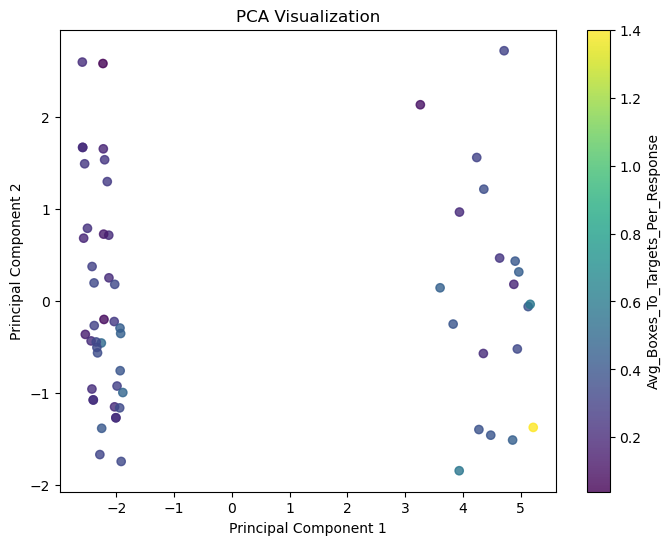

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numeric_features = rplh_df.select_dtypes(include="number").drop(columns=["Avg_Boxes_To_Targets_Per_Response"])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_results, columns=["PC1", "PC2"])
pca_df["Avg_Boxes_To_Targets_Per_Response"] = rplh_df["Avg_Boxes_To_Targets_Per_Response"]
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df["PC1"], pca_df["PC2"],
    c=pca_df["Avg_Boxes_To_Targets_Per_Response"], cmap="viridis", alpha=0.8
)
plt.colorbar(scatter, label="Avg_Boxes_To_Targets_Per_Response")
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

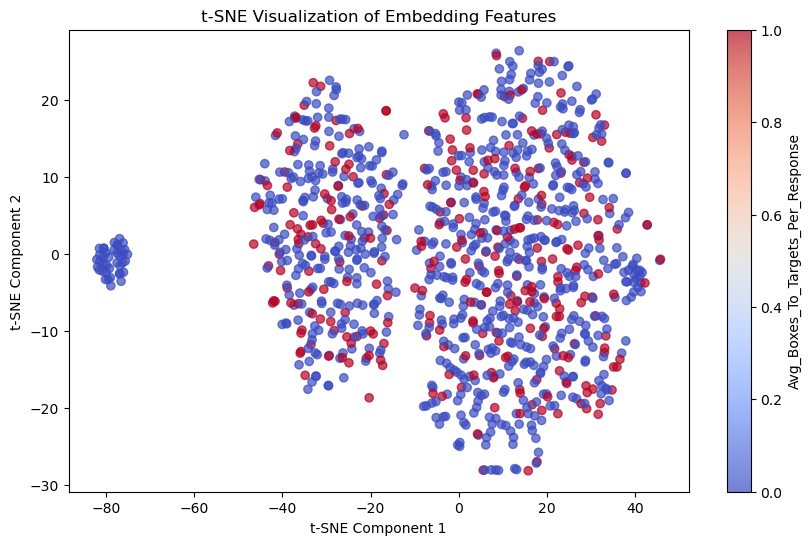

In [43]:
from sklearn.manifold import TSNE

embedding_features = df_expanded.select_dtypes(include="number").drop(columns=["Avg_Boxes_To_Targets_Per_Response"])

scaler = StandardScaler()
embedding_features_scaled = scaler.fit_transform(embedding_features)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embedding_features_scaled)
df_expanded['TSNE_1'] = tsne_results[:, 0]
df_expanded['TSNE_2'] = tsne_results[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_expanded['TSNE_1'], df_expanded['TSNE_2'], c=(df_expanded['Avg_Boxes_To_Targets_Per_Response']).astype(int), cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Avg_Boxes_To_Targets_Per_Response')
plt.title('t-SNE Visualization of Embedding Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

/Users/kevinb/miniforge3/envs/rplh/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


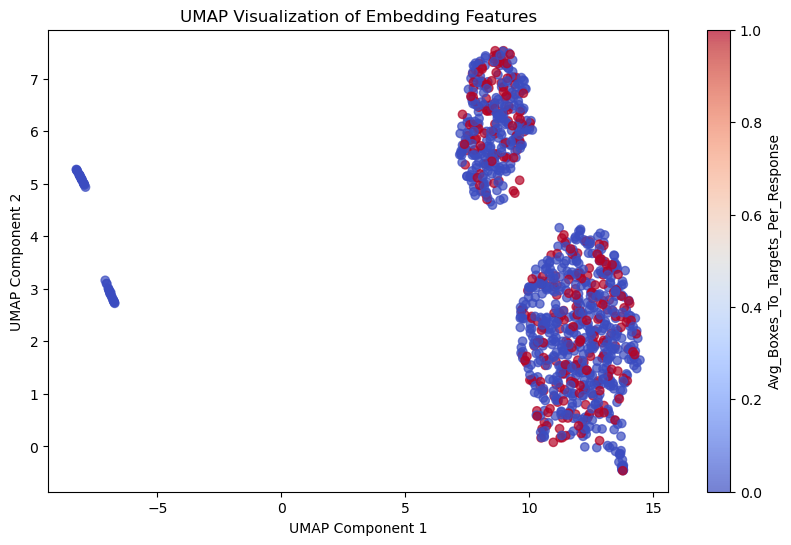

In [44]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_model.fit_transform(embedding_features_scaled)
df_expanded['UMAP_1'] = umap_results[:, 0]
df_expanded['UMAP_2'] = umap_results[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_expanded['UMAP_1'], df_expanded['UMAP_2'], c=(df_expanded['Avg_Boxes_To_Targets_Per_Response']).astype(int), cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Avg_Boxes_To_Targets_Per_Response')
plt.title('UMAP Visualization of Embedding Features')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

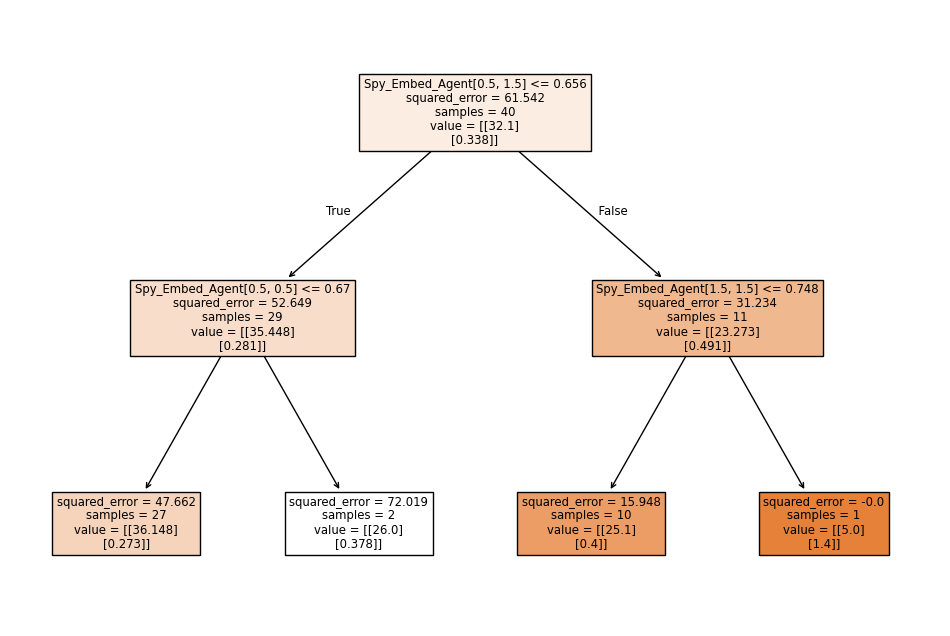

In [45]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

X = rplh_df_all_spy.drop(columns=["Avg_Boxes_To_Targets_Per_Response", "Num_Responses", "Num_Boxes"])
y = rplh_df_all_spy[["Num_Responses", "Avg_Boxes_To_Targets_Per_Response"]]
tree = DecisionTreeRegressor(max_depth=2, random_state=42)
tree.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

***
# Comparing Performance Across Systems All Together
***

We have created functions to yield overall comparison

In [46]:
from rplh.evaluation.evals import get_all_evals

In [62]:
dummy1 = pd.DataFrame(np.nan, index=spy_df.index, columns=spy_df.columns)
dummy2 = pd.DataFrame(np.nan, index=justification_df.index, columns=justification_df.columns)

In [63]:
eval_agent_spy = get_all_evals(df_a_spy, success_df_a_spy, spy_df, justification_df, dist_a_spy, system="rplh-agent-spy-3up")
eval_standard_spy = get_all_evals(df_s_spy, success_df_s_spy, dummy1, justification_df_standard, dist_s_spy, system="rplh-standard-spy-3up")
eval_standard_nospy = get_all_evals(df_s_nospy, success_df_s_nospy, dummy1, justification_df_standard_nospy, dist_s_nospy, system="rplh-standard-nospy-3up")

eval_agent_spy2 = get_all_evals(df_a_spy2, success_df_a_spy2, spy_df2, justification_df2, dist_a_spy2, system="rplh-agent-spy-2up")
eval_standard_spy2 = get_all_evals(df_s_spy, success_df_s_spy2, dummy1, dummy2, dist_s_spy2, system="rplh-standard-spy-2up")
eval_standard_nospy2 = get_all_evals(df_s_nospy, success_df_s_nospy2, dummy1, dummy2, dist_s_nospy2, system="rplh-standard-nospy-2up")

Overall AUC for Norm1: 187.71428571428572
Overall AUC for Norm2: 108.59262775932079
Average slope for Norm1: -0.38765125806035183
Average slope for Norm2: -0.2704926585392068
Overall AUC for Norm1: 228.8181818181818
Overall AUC for Norm2: 133.27889394692093
Average slope for Norm1: -0.3326826865160759
Average slope for Norm2: -0.23993066999109416
Spy model df is empty, no embedding similarity calculated.
Spy model df is empty, no embedding similarity calculated.
Spy model df is empty, no embedding similarity calculated.
Spy model df is empty, no embedding similarity calculated.
Spy model df is empty, no embedding similarity calculated.
Spy model df is empty, no embedding similarity calculated.
Spy model df is empty, no embedding similarity calculated.
Spy model df is empty, no embedding similarity calculated.
Spy model df is empty, no embedding similarity calculated.
Overall AUC for Norm1: 241.80769230769232
Overall AUC for Norm2: 138.93376600704124
Average slope for Norm1: -0.27898558

In [64]:
final = eval_agent_spy.join(eval_standard_spy).join(eval_standard_nospy).join(eval_agent_spy2).join(eval_standard_spy2).join(eval_standard_nospy2)
final.round(3)

,rplh-agent-spy-3up,rplh-standard-spy-3up,rplh-standard-nospy-3up,rplh-agent-spy-2up,rplh-standard-spy-2up,rplh-standard-nospy-2up
Average-AUC-Norm1,187.714,228.818,241.808,143.333,163.571,160.292
Average-AUC-Norm2,108.593,133.279,138.934,77.282,90.352,87.453
Average-Slope1,-0.388,-0.333,-0.279,-0.740,-0.622,-0.567
Average-Slope2,-0.270,-0.240,-0.191,-0.465,-0.371,-0.334
Average-Box-To-Targets-Per-Response,0.406,0.271,0.278,0.391,0.271,0.278
Average-Responses,28.400,35.800,36.950,22.417,35.800,36.950
Average-Convergence-Rate,0.700,0.550,0.650,0.750,0.700,0.600
"Average-Embedding-Similarity-Spy_Embed_Agent[0.5, 0.5]",0.563,NaN,NaN,0.632,NaN,NaN
"Average-Embedding-Similarity-Spy_Embed_Agent[2.5, 2.5]",0.647,NaN,NaN,0.676,NaN,NaN
"Average-Embedding-Similarity-Spy_Embed_Agent[1.5, 1.5]",0.622,NaN,NaN,0.631,NaN,NaN


In [65]:
from tabulate import tabulate
markdown_table = tabulate(final.round(3), headers='keys', tablefmt='pipe')
print(markdown_table)

|                                                        |   rplh-agent-spy-3up |   rplh-standard-spy-3up |   rplh-standard-nospy-3up |   rplh-agent-spy-2up |   rplh-standard-spy-2up |   rplh-standard-nospy-2up |
|:-------------------------------------------------------|---------------------:|------------------------:|--------------------------:|---------------------:|------------------------:|--------------------------:|
| Average-AUC-Norm1                                      |              187.714 |                 228.818 |                   241.808 |              143.333 |                 163.571 |                   160.292 |
| Average-AUC-Norm2                                      |              108.593 |                 133.279 |                   138.934 |               77.282 |                  90.352 |                    87.453 |
| Average-Slope1                                         |               -0.388 |                  -0.333 |                    -0.279 |             

***
# Bootstraped Comparison
***

In [55]:
from rplh.evaluation.evals import get_all_boots_evals

In [56]:
eval_agent_spy = get_all_boots_evals(df_a_spy, success_df_a_spy, dist_a_spy, system="rplh-agent-spy-3up")
eval_standard_spy = get_all_boots_evals(df_s_spy, success_df_s_spy, dist_s_spy, system="rplh-standard-spy-3up")
eval_standard_nospy = get_all_boots_evals(df_s_nospy, success_df_s_nospy, dist_s_nospy, system="rplh-standard-nospy-3up")

Overall AUC for Norm1: 187.59728928571428
Overall AUC for Norm2: 108.51321156842948
Overall AUC for Norm1: 229.18035454545455
Overall AUC for Norm2: 133.50156261428575
Overall AUC for Norm1: 241.8545269230769
Overall AUC for Norm2: 138.95139563073764


In [57]:
final = eval_agent_spy.join(eval_standard_spy).join(eval_standard_nospy)
final

,rplh-agent-spy-3up,rplh-standard-spy-3up,rplh-standard-nospy-3up
Average-AUC-Norm1,187.597289,229.180355,241.854527
Average-AUC-Norm2,108.513212,133.501563,138.951396
Average-avg-Box-To-Targets-Per-Response,0.405787,0.271156,0.277290
Average-Responses,28.418960,35.800005,37.000520
Average-Convergence-Rate,0.698680,0.549885,0.648310
